In [52]:
%matplotlib inline
from matplotlib import pyplot
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.affinity import scale
from shapely.affinity import translate
import numpy as np

import sys
sys.path.insert(0, "../")
from weavingspace import TileUnit
from weavingspace import Tiling

In [53]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

# Wobbly-sided 'Escherian' squares
This notebook has now been updated to show how the `Topology` class can be used to take a base tiling and modify it while retaining tileability.

First, we make a 4-colouring by squares.

In [54]:
spacing = 500
unit = TileUnit(tiling_type = "square-colouring", n = 4, crs = ak.crs, spacing = spacing).transform_rotate(30)

Then we extract its 'topology' and visualise it with labels showing identifiers for distinct vertices and edges of the tiling. 

<Axes: >

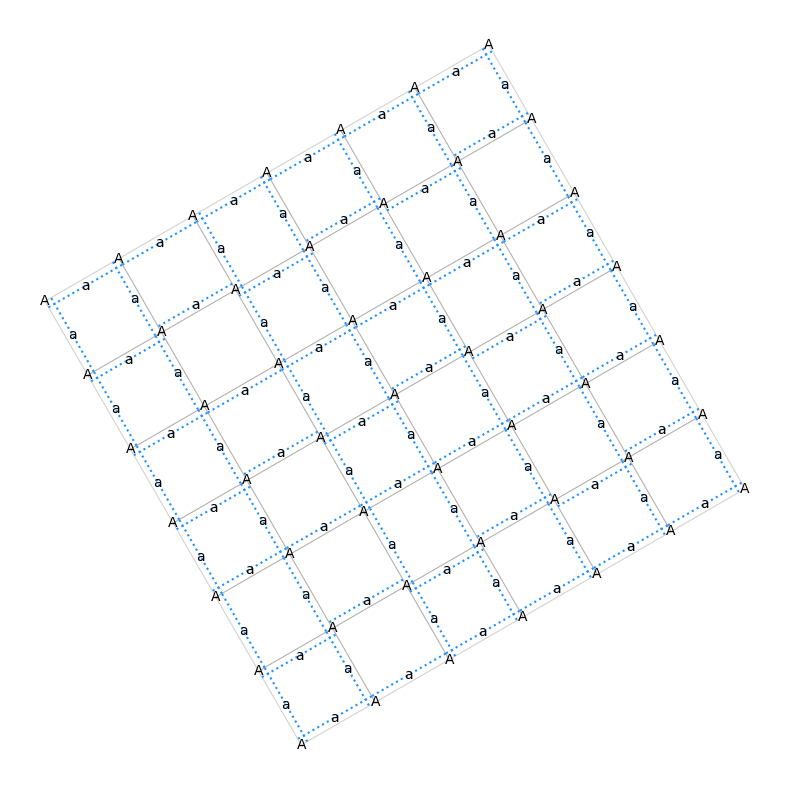

In [55]:
from weavingspace import Topology
topo = Topology(unit)
topo.plot(show_edge_labels=True)

Next we apply a 'transform' to a selected labelled part of the tiling's topology, in this case 'zig-zagging' each edge labelled 'a' (which is actually all of them).

CAUTION: new Topology will probably not be correctly labelled. To build a correct Topology, extract the tileable attribute and rebuild Topology from that.


<Axes: >

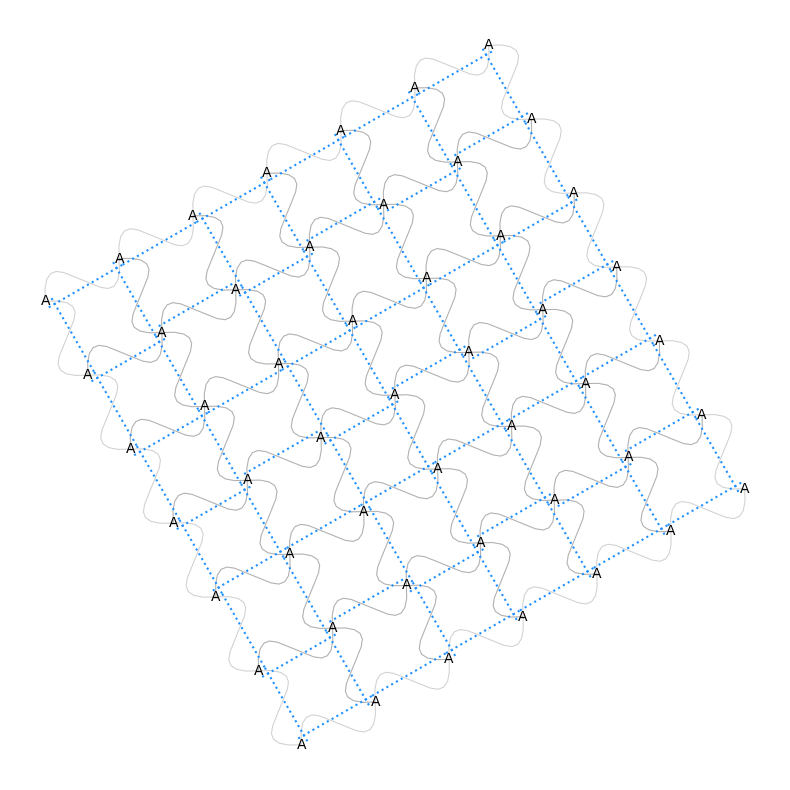

In [56]:
topo2 = topo.transform_geometry(True, True, "a", "zigzag_edge",
                   n=2, start="A", h=.5, smoothness=5)
topo2.plot()

Now we can assign the `tileable` attribute of the new `Topology` object as a `TileUnit`.

<Axes: >

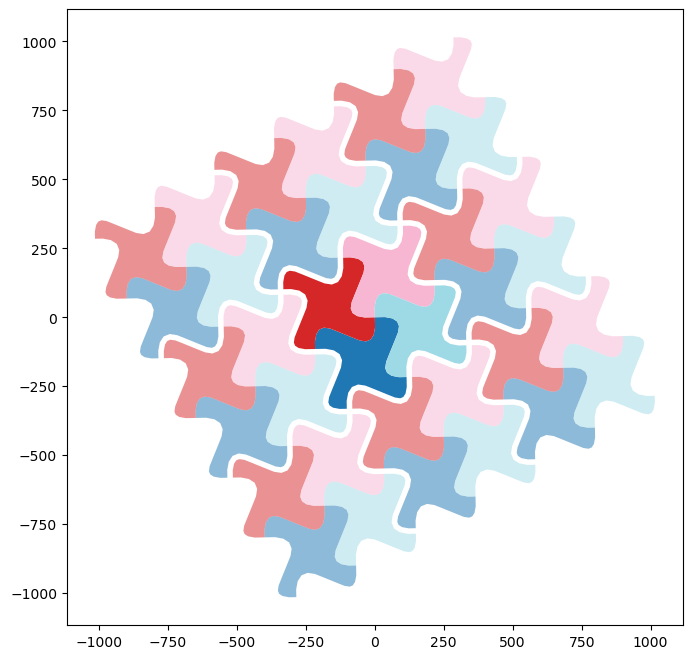

In [57]:
escher_unit = topo2.tileable
escher_unit._setup_regularised_prototile(override = True)
escher_unit = escher_unit.inset_prototile(10)
escher_unit.plot(r = 1, show_prototile = False, show_reg_prototile = False,
                 r_alpha = 0.5, cmap = "tab20", show_ids = False)

In [58]:
tiling = Tiling(escher_unit, ak)

In [59]:
t30 = tiling.get_tiled_map()

No colour maps provided! Setting some defaults.


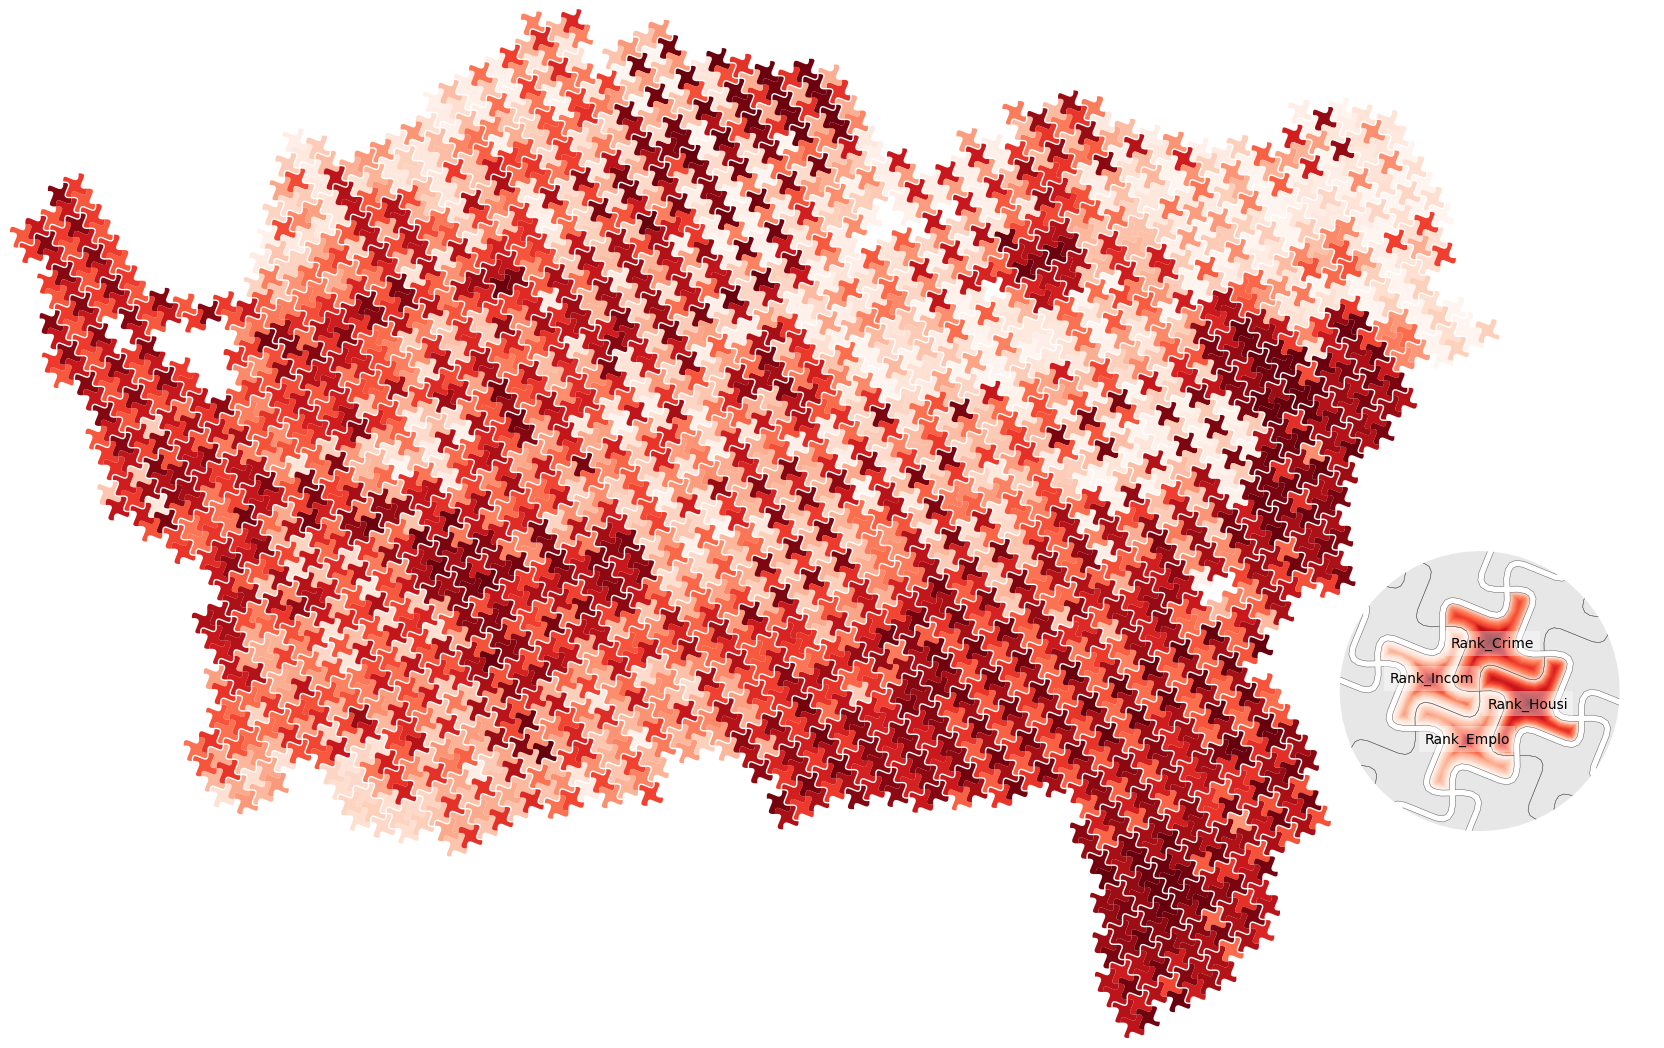

In [60]:
t30.ids_to_map = list("abcd")
t30.vars_to_map = [x for x in ak if "Rank" in x and not "IMD" in x]
fig = t30.render(legend_zoom = .8, use_ellipse = True, 
                 legend_dx = -0.075, legend_dy = -0.375)

This seems to work well showing up constrasting variables... and surprisingly it seems to be possible to tell that it's the same variable contrasting in most cases, due to the grid locations.